In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('wine', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('wine', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('wine')
num_tries = 15

In [3]:
dataset_shapes

([13], [3])

# Scalar network without hidden layers
*Maybe, linear model is enough for this task?*

Average elapsed k-fold validation time: 252.55360 sec
Last measures: [0.08820142894983292, 0.1254293754696846, 0.09306693561375141, 0.13365319482982158, 0.07032107412815095]


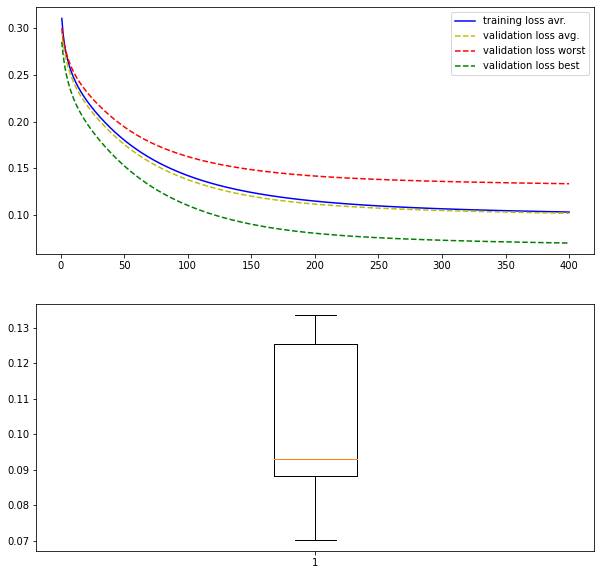

In [4]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with one hidden layer

### S(2)
*Seems to be not enough*

Average elapsed k-fold validation time: 270.94105 sec
Last measures: [0.2557470738887787, 0.20792171955108643, 0.19016231149435042, 0.20280060917139053, 0.13068093359470367]


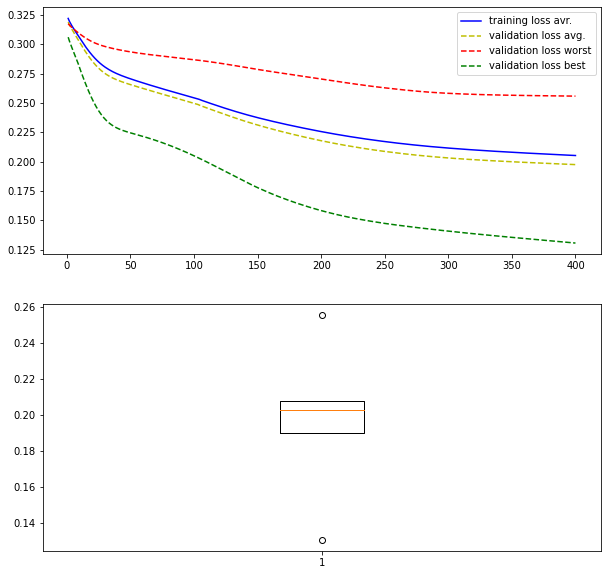

In [5]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(5)

Average elapsed k-fold validation time: 270.72880 sec
Last measures: [0.1721685290336609, 0.12175570279359818, 0.16585451662540435, 0.24554975032806398, 0.07910485006868839]


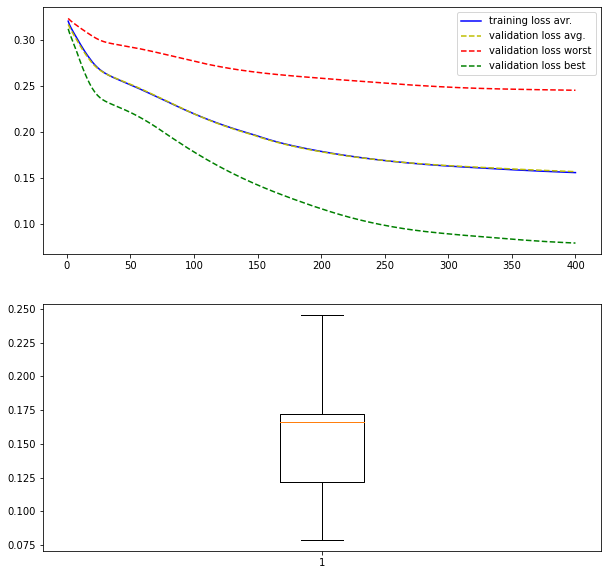

In [6]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(15)
*Smaller error*

Average elapsed k-fold validation time: 270.90643 sec
Last measures: [0.17022731211036443, 0.041263713873922823, 0.1364116955548525, 0.185072242282331, 0.07327298298478127]


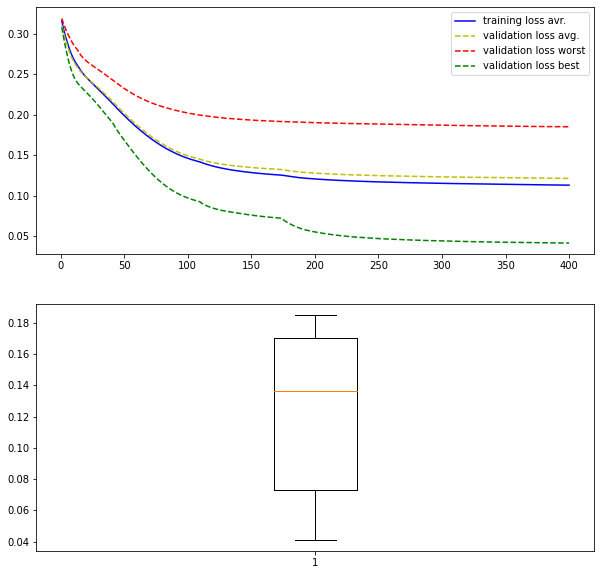

In [7]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[15], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(30)
*Small improvements in average, but better potential*

Average elapsed k-fold validation time: 269.97389 sec
Last measures: [0.04740679357200861, 0.1166738798841834, 0.1612693414092064, 0.1590377263724804, 0.15367329437285662]


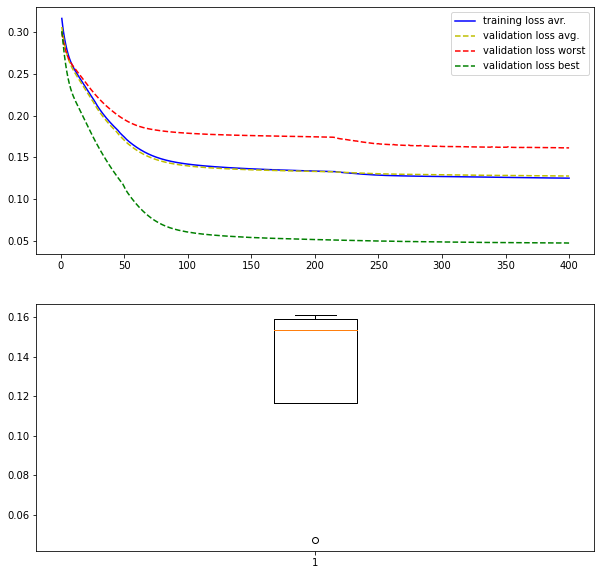

In [8]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[30], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with three hidden layers

### S(2,2,2)
*Worse than S(2)*

Average elapsed k-fold validation time: 300.88778 sec
Last measures: [0.25851593911647797, 0.2641803830862045, 0.2621243864297867, 0.2524708494544029, 0.2302863895893097]


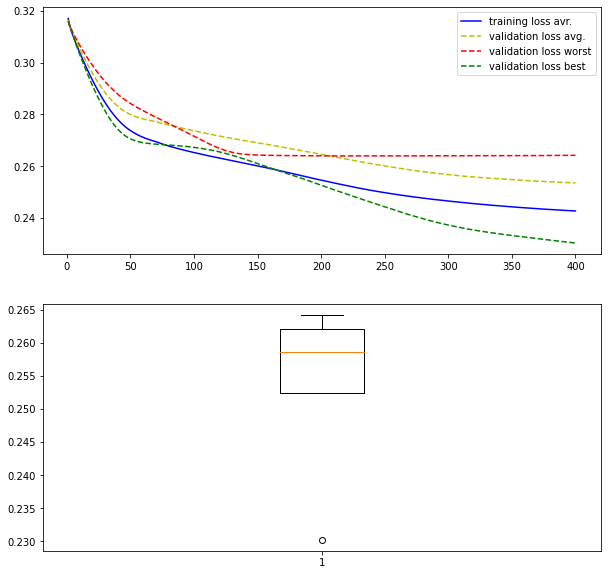

In [9]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2,2,2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(10,7,5)
*Small improvement, worse than S(15)*

Average elapsed k-fold validation time: 306.73973 sec
Last measures: [0.1661948010325432, 0.25682779848575593, 0.20705559626221656, 0.15206097960472106, 0.21136876493692397]


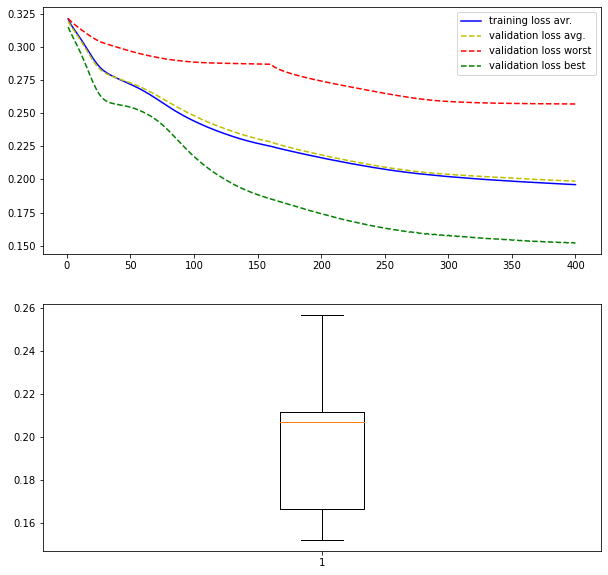

In [10]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[10,7,5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), unique weights

### V1(2):U(2)
*Bad result, worse than S(2)*

Average elapsed k-fold validation time: 316.13407 sec
Last measures: [0.2371638834476471, 0.16765582263469697, 0.2555446833372116, 0.21399208344519138, 0.2414222165942192]


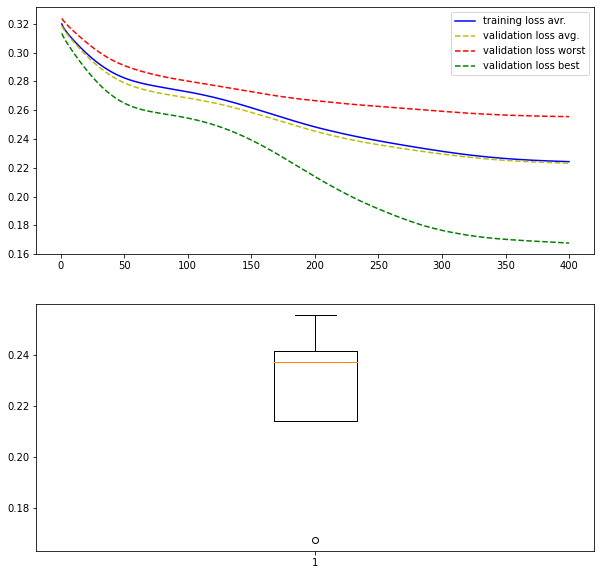

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):U(2)
*Better than V1(2):U(2), but worse than even S(5)*

Average elapsed k-fold validation time: 313.95959 sec
Last measures: [0.18127527162432672, 0.1483253628015518, 0.1889468178153038, 0.17736195027828217, 0.15968080163002013]


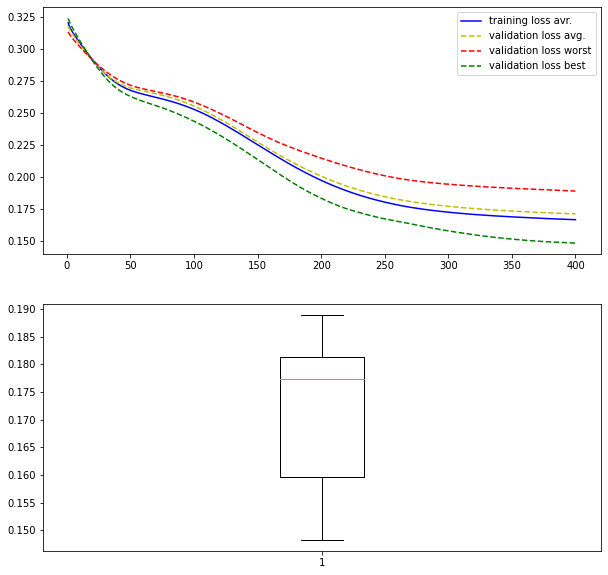

In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), shared weights

### V1(2):S(2)
*Not much better than V1(2):U(2)*

Average elapsed k-fold validation time: 331.41832 sec
Last measures: [0.22518182098865508, 0.24718485176563262, 0.1946704864501953, 0.21269627958536147, 0.19534909278154372]


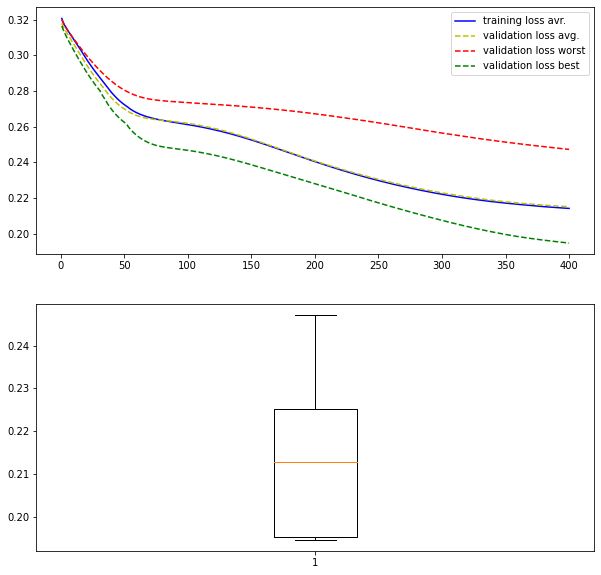

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):S(2)
*Worse than S(5)*

Average elapsed k-fold validation time: 329.95480 sec
Last measures: [0.11387050338089466, 0.21883498579263688, 0.14556726589798927, 0.17581270039081573, 0.18489921018481253]


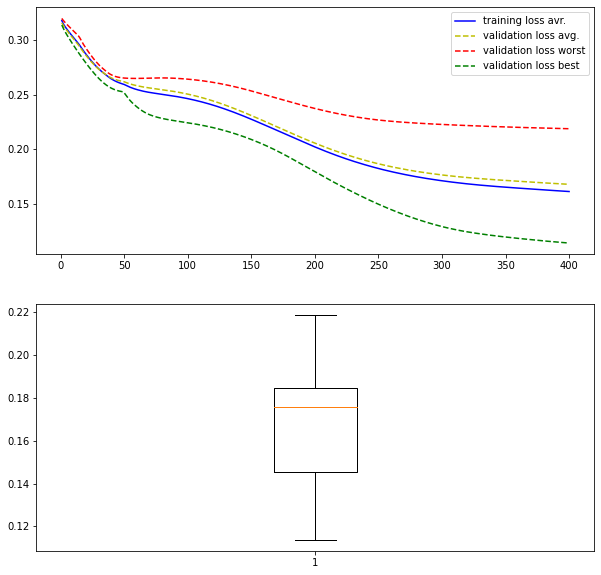

In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")